In [1]:
from os.path import join
from glob import glob

from tqdm import tqdm

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm, colors
import seaborn as sns

from scipy import stats

from sklearn.preprocessing import StandardScaler

# from nilearn import image, plotting
# from nilearn.maskers import NiftiLabelsMasker

from subprocess import getoutput

---

In [2]:
def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        return "****"
    elif pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    return "ns"

---

In [3]:
dir_csv = '/home/sungbeenpark/Github/labs/SMC'
dir_root = '/mnt/ext5/SMC'
dir_behav = join(dir_root,'behav_data')
# dir_fmri = '/mnt/ext5/SMC/fmri_data/'
# dir_mask = join(dir_fmri, 'masks')
# dir_corr = join(dir_fmri, 'stats/correlations/lHP')

---

In [4]:
## Valid participant list
list_subj = [
    '12', '17', '18', '19', '20',
    '22', '24', '25', '27', '31',
    '32', '33', '36', '37', '38',
    '40', '43', '46', '47', '48',
]
# ## Valid participant list for a post phase
# list_subj = [
#     '10', '11',
#     '12', '17', '18', '19', '20',
#     '22', '24', '25', '27', '31',
#     '32', '33', '36', '37', '38',
#     '40', '43', '46', '47', '48',
# ]

---

## A list of neuropsychological profiles

EXCEL

In [5]:
df = pd.read_excel(
    join(dir_csv,'SMC_behav.xlsx'),
#     index_col='tms_id'
)
print(df.columns)
df

Index(['enrollment No', 'tms_id', 'no', 'c0_t1', 'mmse_', 'moca_', 'adascog_',
       'cowatsementicanimal_', 'cowatsemanticmarker_', 'cowatphonemicgieog_',
       'cowatphonemiceuong_', 'cowatphonemicsiot_', 'ktmte_parta_time_',
       'ktmte_partb_time_', 'stroop_word_', 'stroop_color_', 'sgds_', 'cdr_',
       'cdr_sob_', 'siadl_present_', 'screening no ', 'initial ', 'sex', 'age',
       'birthdate', 'education year', 'diagnosis', 'PET or CSF', 'Type',
       'Result', 'CANTAB1', 'CANTAB2', 'MRI-2', '영상전달 ', 'CANTAB-3', '연구종료',
       'APOE4carrier=1, non-carrier=0', 'HTN', 'DM', 'Hyperlipidemia',
       'cardiac disease', 'stroke'],
      dtype='object')


,enrollment No,tms_id,no,c0_t1,mmse_,moca_,adascog_,cowatsementicanimal_,cowatsemanticmarker_,cowatphonemicgieog_,...,MRI-2,영상전달,CANTAB-3,연구종료,"APOE4carrier=1, non-carrier=0",HTN,DM,Hyperlipidemia,cardiac disease,stroke
0,SMC-20-D009-02,S05,1,0,25,23,26,16,7,16,...,2020-09-14,완료,2020-10-06,완료,1.0,0,0,0,0,0
1,SMC-20-D009-02,S05,2,0,22,21,26,13,10,13,...,2020-09-14,완료,2020-10-06,완료,1.0,0,0,0,0,0
2,SMC-20-D009-02,S05,3,0,23,22,27,13,14,17,...,2020-09-14,완료,2020-10-06,완료,1.0,0,0,0,0,0
3,SMC-20-D010-03,S06,1,0,19,17,32,9,5,11,...,2020-09-15,완료,2020-10-06,완료,1.0,0,0,1,0,0
4,SMC-20-D010-03,S06,2,0,21,17,38,5,5,7,...,2020-09-15,완료,2020-10-06,완료,1.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,SMC-20-D009-43,S48,2,1,27,23,18,12,24,16,...,2022-05-23,NaN,2022-06-11,완료,1.0,0,0,1,0,0
86,SMC-20-D009-43,S48,3,1,27,25,14,15,21,18,...,2022-05-23,NaN,2022-06-11,완료,1.0,0,0,1,0,0
87,SMC-20-D009-45,S50,1,1,23,19,35,4,6,7,...,2022-04-18,NaN,2022-05-19,완료,1.0,0,0,1,0,0
88,SMC-20-D009-45,S50,2,1,24,18,27,10,8,8,...,2022-04-18,NaN,2022-05-19,완료,1.0,0,0,1,0,0


SPSS

In [6]:
df = pd.read_spss(join(dir_behav, '20221018.sav')).head(90)
print(df.columns)
df

Index(['tms_id', 'no', 'c0_t1', 'mmse', 'moca', 'adascog',
       'cowatsementicanimal', 'cowatsemanticmarker', 'cowatphonemicgieog',
       'cowatphonemiceuong', 'cowatphonemicsiot', 'ktmte_parta_successfail',
       'ktmte_parta_time', 'ktmte_partb_successfail', 'ktmte_partb_time',
       'stroop_word', 'stroop_color', 'sgds', 'cdr', 'cdr_sob',
       'siadl_present', 'siadl_potential', 'screeningno', 'initial', 'sex',
       'age', 'birthdate', 'educationyear', 'diagnosis', 'PETorCSF', 'Type',
       'Result', 'CANTAB1', 'CANTAB2', 'MRI2', '영상전달', 'CANTAB3', '연구종료',
       'Row', 'ScreeningNo_A', 'DMSPC0', 'DMSPC12', 'DMSPC4', 'DMSPCAD',
       'DMSPCS', 'DMSPEGE', 'MOTML', 'PALFAMS', 'PALTEA', 'PRMPCD', 'PRMPCI',
       'RTIFMDMT', 'RTIFMDRT', 'RVPA', 'RVPMDL', 'RVPPFA', 'SWMBE468', 'SWMS',
       'APOE4carrier1noncarrier0', 'HTN', 'DM', 'Hyperlipidemia',
       'cardiacdisease', 'stroke', 'filter_$'],
      dtype='object')


,tms_id,no,c0_t1,mmse,moca,adascog,cowatsementicanimal,cowatsemanticmarker,cowatphonemicgieog,cowatphonemiceuong,...,RVPPFA,SWMBE468,SWMS,APOE4carrier1noncarrier0,HTN,DM,Hyperlipidemia,cardiacdisease,stroke,filter_$
0,S05,1.0,0.0,25.0,23.0,26.0,16.0,7.0,16.0,13.0,...,0.0062,25.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,Not Selected
1,S05,2.0,0.0,22.0,21.0,26.0,13.0,10.0,13.0,16.0,...,0.0060,23.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,Not Selected
2,S05,3.0,0.0,23.0,22.0,27.0,13.0,14.0,17.0,14.0,...,0.0041,25.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,Not Selected
3,S06,1.0,0.0,19.0,17.0,32.0,9.0,5.0,11.0,3.0,...,0.0043,26.0,9.0,1.0,0.0,0.0,1.0,0.0,0.0,Not Selected
4,S06,2.0,0.0,21.0,17.0,38.0,5.0,5.0,7.0,3.0,...,0.0000,18.0,11.0,1.0,0.0,0.0,1.0,0.0,0.0,Not Selected
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,S48,2.0,1.0,27.0,23.0,18.0,12.0,24.0,16.0,21.0,...,0.0040,28.0,10.0,1.0,0.0,0.0,1.0,0.0,0.0,Not Selected
86,S48,3.0,1.0,27.0,25.0,14.0,15.0,21.0,18.0,19.0,...,0.0118,27.0,11.0,1.0,0.0,0.0,1.0,0.0,0.0,Selected
87,S50,1.0,1.0,23.0,19.0,35.0,4.0,6.0,7.0,5.0,...,NaN,NaN,NaN,1.0,0.0,0.0,1.0,0.0,0.0,Not Selected
88,S50,2.0,1.0,24.0,18.0,27.0,10.0,8.0,8.0,4.0,...,NaN,NaN,NaN,1.0,0.0,0.0,1.0,0.0,0.0,Not Selected


---

In [7]:
list_profile = [
    'adascog', 
    'siadl_present', #'siadl_potential',
    'cdr_sob', #'cdr'
]

In [8]:
df[['tms_id','no','c0_t1',*list_profile]]

,tms_id,no,c0_t1,adascog,siadl_present,cdr_sob
0,S05,1.0,0.0,26.0,10.0,5.5
1,S05,2.0,0.0,26.0,8.0,5.5
2,S05,3.0,0.0,27.0,13.0,5.5
3,S06,1.0,0.0,32.0,35.0,10.0
4,S06,2.0,0.0,38.0,33.0,10.0
...,...,...,...,...,...,...
85,S48,2.0,1.0,18.0,5.0,1.5
86,S48,3.0,1.0,14.0,4.0,1.5
87,S50,1.0,1.0,35.0,15.0,5.0
88,S50,2.0,1.0,27.0,15.0,5.0


In [9]:
for profile in list_profile:
    print(profile)
    for visit in [2,3]:
        a = df[(df.no==visit)&(df.c0_t1==0)][profile]
        b = df[(df.no==visit)&(df.c0_t1==1)][profile]
        tval, pval = stats.ttest_ind(a,b,alternative='two-sided')
        print('V%1d (sham %d vs. stim %d): t=%.3e \tp=%.3f (%s)'%(visit-1,len(a),len(b),tval,pval*0.5,convert_pvalue_to_asterisks(pval*0.5)))
    a = df[(df.no==2)&(df.c0_t1==0)][profile] - df[(df.no==1)&(df.c0_t1==0)][profile]
    b = df[(df.no==2)&(df.c0_t1==1)][profile] - df[(df.no==1)&(df.c0_t1==1)][profile]
    tval, pval = stats.ttest_ind(a,b,alternative='two-sided')
    print('V1-V0: t=%.3e \t p=%.5f (%s)'%(tval, pval*0.5, convert_pvalue_to_asterisks(pval*0.5)))

adascog
V1 (sham 12 vs. stim 18): t=1.371e+00 	p=0.091 (ns)
V2 (sham 12 vs. stim 18): t=1.615e+00 	p=0.059 (ns)
V1-V0: t=nan 	 p=nan (ns)
siadl_present
V1 (sham 12 vs. stim 18): t=5.349e-01 	p=0.298 (ns)
V2 (sham 12 vs. stim 18): t=9.211e-01 	p=0.182 (ns)
V1-V0: t=nan 	 p=nan (ns)
cdr_sob
V1 (sham 12 vs. stim 18): t=8.772e-01 	p=0.194 (ns)
V2 (sham 12 vs. stim 18): t=1.119e+00 	p=0.136 (ns)
V1-V0: t=nan 	 p=nan (ns)


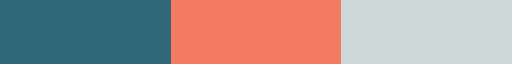

In [10]:
palette = ['#316879','#f47a60','#ced7d8']
cmap = colors.ListedColormap(palette)
cmap

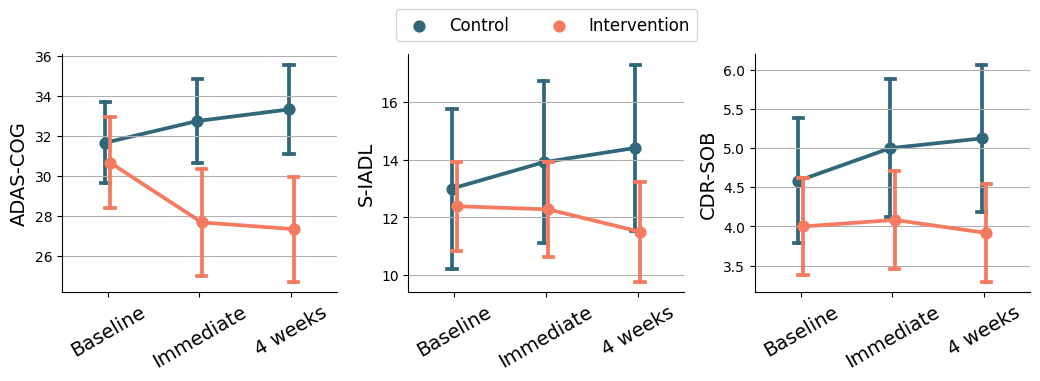

In [11]:
ncols = len(list_profile)
fig, axs = plt.subplots(ncols=ncols, figsize=(3.5*ncols,3.5))

# list_pval = [0.002,0.004,0.007]
for ii, profile in enumerate(list_profile):
    ax = axs[ii]
    g = sns.pointplot(
        data=df,
        x='no', y=profile, hue='c0_t1',
        errorbar='se', capsize=0.1,
        dodge=True,
        palette=palette,
        ax=ax
    )
    g.legend().remove()
    g.grid(axis='y')
    g.set_xticklabels(['Baseline','Immediate','4 weeks'], fontsize=14, rotation=30)
    g.set_xlabel('')
    if profile == 'adascog':
        ylabel = 'ADAS-COG'
    elif profile == 'siadl_present':
        ylabel = 'S-IADL'
    elif profile == 'cdr_sob':
        ylabel = 'CDR-SOB'
    g.set_ylabel(ylabel, fontsize=14)
    y1, y2 = g.get_ylim()

#     g.text(
#         2, y1+(y2-y1)*0.1,
#         'p=%.3f'%list_pval[ii],
#         ha='center', va='center'
#     )
    
    h, l = g.get_legend_handles_labels()

#     for visit in [1,2]:
#         a = df[(df.no==visit+1)&(df.c0_t1==0)][profile]
#         b = df[(df.no==visit+1)&(df.c0_t1==1)][profile]
#         tval, pval = stats.ttest_ind(a,b,alternative='two-sided')
#         g.text(
#             visit, y1+(y2-y1)*0.1,
#             'p=%.3f'%(pval*0.5),
#             ha='center', va='center'
#         )
    sns.despine()

legendlabels = ['Control' if text=='0.0' else('Intervention' if text=='1.0' else 'invalid') for text in l]
fig.legend(
    h, legendlabels, ncols=2,
    bbox_to_anchor=(0.525, 1.1),
    loc='upper center',
    fontsize=12
)

fig.tight_layout()

---

In [12]:
df = pd.read_excel(
    join(dir_csv,'SMC_behav.xlsx')
#     , index_col='tms_id'
)
df.set_index(['tms_id'], inplace=True)
tmp = df.drop([
    'c0_t1', 'APOE4carrier=1, non-carrier=0', 'CANTAB-3', 'CANTAB1', 'CANTAB2',
    'DM', 'HTN', 'Hyperlipidemia', 'MRI-2', 'PET or CSF', 'Result',
    'Type', 'age', 'birthdate', 'cardiac disease', 'diagnosis',
    'education year', 'enrollment No', 'initial ',
    'screening no ', 'sex', 'stroke', '연구종료', '영상전달 '
], axis=1, inplace=False)

## baseline
df1 = tmp[tmp.no==1]
## 4 weeks later
df2 = tmp[tmp.no==2]
## 8 weeks later
df3 = tmp[tmp.no==3]

print(df.columns)
print(tmp.columns)
df

Index(['enrollment No', 'no', 'c0_t1', 'mmse_', 'moca_', 'adascog_',
       'cowatsementicanimal_', 'cowatsemanticmarker_', 'cowatphonemicgieog_',
       'cowatphonemiceuong_', 'cowatphonemicsiot_', 'ktmte_parta_time_',
       'ktmte_partb_time_', 'stroop_word_', 'stroop_color_', 'sgds_', 'cdr_',
       'cdr_sob_', 'siadl_present_', 'screening no ', 'initial ', 'sex', 'age',
       'birthdate', 'education year', 'diagnosis', 'PET or CSF', 'Type',
       'Result', 'CANTAB1', 'CANTAB2', 'MRI-2', '영상전달 ', 'CANTAB-3', '연구종료',
       'APOE4carrier=1, non-carrier=0', 'HTN', 'DM', 'Hyperlipidemia',
       'cardiac disease', 'stroke'],
      dtype='object')
Index(['no', 'mmse_', 'moca_', 'adascog_', 'cowatsementicanimal_',
       'cowatsemanticmarker_', 'cowatphonemicgieog_', 'cowatphonemiceuong_',
       'cowatphonemicsiot_', 'ktmte_parta_time_', 'ktmte_partb_time_',
       'stroop_word_', 'stroop_color_', 'sgds_', 'cdr_', 'cdr_sob_',
       'siadl_present_'],
      dtype='object')


,enrollment No,no,c0_t1,mmse_,moca_,adascog_,cowatsementicanimal_,cowatsemanticmarker_,cowatphonemicgieog_,cowatphonemiceuong_,...,MRI-2,영상전달,CANTAB-3,연구종료,"APOE4carrier=1, non-carrier=0",HTN,DM,Hyperlipidemia,cardiac disease,stroke
tms_id,,,,,,,,,,,,,,,,,,,,,
S05,SMC-20-D009-02,1,0,25,23,26,16,7,16,13,...,2020-09-14,완료,2020-10-06,완료,1.0,0,0,0,0,0
S05,SMC-20-D009-02,2,0,22,21,26,13,10,13,16,...,2020-09-14,완료,2020-10-06,완료,1.0,0,0,0,0,0
S05,SMC-20-D009-02,3,0,23,22,27,13,14,17,14,...,2020-09-14,완료,2020-10-06,완료,1.0,0,0,0,0,0
S06,SMC-20-D010-03,1,0,19,17,32,9,5,11,3,...,2020-09-15,완료,2020-10-06,완료,1.0,0,0,1,0,0
S06,SMC-20-D010-03,2,0,21,17,38,5,5,7,3,...,2020-09-15,완료,2020-10-06,완료,1.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S48,SMC-20-D009-43,2,1,27,23,18,12,24,16,21,...,2022-05-23,NaN,2022-06-11,완료,1.0,0,0,1,0,0
S48,SMC-20-D009-43,3,1,27,25,14,15,21,18,19,...,2022-05-23,NaN,2022-06-11,완료,1.0,0,0,1,0,0
S50,SMC-20-D009-45,1,1,23,19,35,4,6,7,5,...,2022-04-18,NaN,2022-05-19,완료,1.0,0,0,1,0,0


In [13]:
dg = df.c0_t1.groupby(['tms_id']).mean().astype(int).to_frame()
dg

,c0_t1
tms_id,
S05,0
S06,0
S09,1
S10,0
S11,1
S12,1
S14,0
S15,1
S17,0


---

In [14]:
tmp = df2-df1
tmp.reset_index(inplace=True)
for subj in tmp.tms_id:
    nn = subj[1:]
    if not nn in list_subj:
        tmp.drop(tmp[tmp.tms_id==subj].index, inplace=True)
tmp.set_index('tms_id', inplace=True)
tmp

,no,mmse_,moca_,adascog_,cowatsementicanimal_,cowatsemanticmarker_,cowatphonemicgieog_,cowatphonemiceuong_,cowatphonemicsiot_,ktmte_parta_time_,ktmte_partb_time_,stroop_word_,stroop_color_,sgds_,cdr_,cdr_sob_,siadl_present_
tms_id,,,,,,,,,,,,,,,,,
S12,1,2,-3,-2,1,5,6,3,1,13,30,0,23,-2,0.0,1.0,3
S17,1,-1,-4,4,0,2,-3,0,-1,-14,-26,-1,-32,0,0.0,0.5,3
S18,1,-1,-4,1,-3,0,1,1,-2,22,0,-62,2,1,0.0,1.0,0
S19,1,-2,1,-3,-3,4,-2,0,1,4,0,0,0,-1,0.0,0.0,0
S20,1,-3,-1,-1,0,2,2,-1,-2,-1,-47,6,-6,0,0.0,0.0,1
S22,1,0,2,-5,-6,-1,6,0,1,3,13,0,0,-2,0.0,0.0,0
S24,1,-2,0,0,2,-2,2,-1,-1,23,16,0,-7,0,0.0,0.0,2
S25,1,0,1,1,3,1,1,-4,-1,-1,-2,-68,3,-4,0.0,0.5,0
S27,1,5,-1,-5,0,3,4,3,3,-1,26,0,-54,0,0.5,0.5,1


---

In [15]:
dh = tmp
for subj in dh.index:
    group = df.loc[subj,'c0_t1'].unique()[0]
    dh.loc[subj,'c0_t1'] = 'Stim' if group==1 else ('Sham' if group==0 else 'invalid')

hue = [
    'mmse_', 'moca_', 'adascog_', 'cowatsementicanimal_',
    'cowatsemanticmarker_', 'cowatphonemicgieog_', 'cowatphonemiceuong_',
    'cowatphonemicsiot_', 'ktmte_parta_time_', 'ktmte_partb_time_',
    'stroop_word_', 'stroop_color_', 'sgds_', 'cdr_', 'cdr_sob_','siadl_present_'
]

dh = pd.melt(
    dh, ignore_index=False,
    id_vars=['no','c0_t1'],
    value_vars=hue
)

dh.reset_index(inplace=True)

for h in hue:
    a = dh[(dh.c0_t1=='Sham')&(dh.variable==h)].value
    b = dh[(dh.c0_t1=='Stim')&(dh.variable==h)].value
    tval, pval = stats.ttest_ind(a,b,alternative='two-sided')
    print('%s: %.3f (%s)'%(h,pval,convert_pvalue_to_asterisks(pval)))
#     if not pval < 0.05:
#         dh.drop(dh[dh.variable==h].index, inplace=True)

dh

mmse_: 0.552 (ns)
moca_: 0.450 (ns)
adascog_: 0.284 (ns)
cowatsementicanimal_: 0.626 (ns)
cowatsemanticmarker_: 0.596 (ns)
cowatphonemicgieog_: 0.435 (ns)
cowatphonemiceuong_: 0.226 (ns)
cowatphonemicsiot_: 0.290 (ns)
ktmte_parta_time_: 0.314 (ns)
ktmte_partb_time_: 0.936 (ns)
stroop_word_: 0.047 (*)
stroop_color_: 0.044 (*)
sgds_: 0.783 (ns)
cdr_: 0.230 (ns)
cdr_sob_: 0.376 (ns)
siadl_present_: 0.297 (ns)


,tms_id,no,c0_t1,variable,value
0,S12,1,Stim,mmse_,2.0
1,S17,1,Sham,mmse_,-1.0
2,S18,1,Sham,mmse_,-1.0
3,S19,1,Stim,mmse_,-2.0
4,S20,1,Sham,mmse_,-3.0
...,...,...,...,...,...
315,S40,1,Stim,siadl_present_,0.0
316,S43,1,Stim,siadl_present_,0.0
317,S46,1,Stim,siadl_present_,2.0
318,S47,1,Stim,siadl_present_,2.0


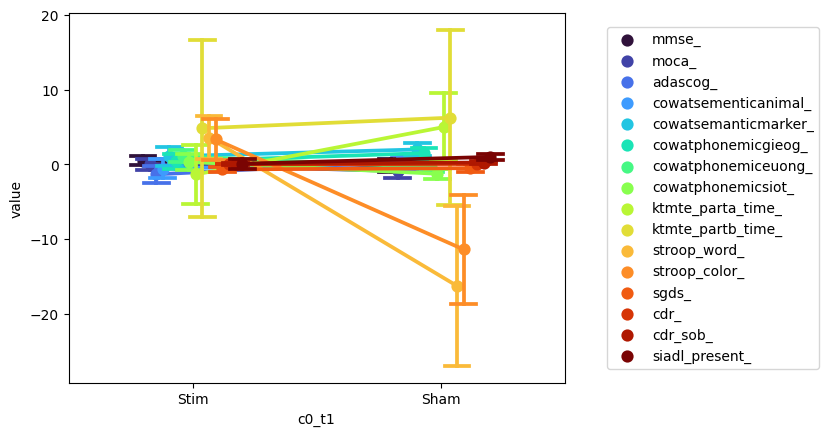

In [16]:
g = sns.pointplot(
    data=dh,
    x='c0_t1', y='value',
    hue='variable', palette=cm.turbo(np.linspace(0,1,len(hue))),
    errorbar='se', capsize=0.1,
    dodge=True
)

g.legend(bbox_to_anchor=(1.3, 0.5), loc='center', ncol=1)

---

In [17]:
scaler = StandardScaler()
for eval_ in dh.variable.unique():
    a = dh[dh.variable==eval_].value
    b = scaler.fit_transform(a.values.reshape(-1,1))
    fname=join(dir_behav,'%s.n%02d.txt'%(eval_,len(dh.tms_id.unique())))
    np.savetxt(
        fname=fname,
        X=b.reshape(-1),
        fmt='%.5e'
    )